# Sample Gaussian Process Paths

In [2]:
%load_ext autoreload
%autoreload 2

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import GPy

## Define helper functions

In [11]:
def hide_upper_ax_lines(ax):
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

def plot_gp_paths(data, ax=None, **kwargs): 
    ax = ax or plt.gca()
    for i in range(data.shape[0]):
        ax.plot(X, data[i], lw=2, **kwargs)
    return plt.gca()

## Generate Data

In [12]:
n_paths = 3

se_1 = GPy.kern.RBF(input_dim=1, lengthscale=0.2)
per_1 = GPy.kern.StandardPeriodic(input_dim=1, lengthscale=0.2)
lin_1 = GPy.kern.LinScaleShift(input_dim=1)
rq_1 = GPy.kern.RationalQuadratic(input_dim=1, lengthscale=0.2)

X = np.linspace(0.,1.,500)
X = X[:, None]
def sample_gp_paths(k, n):
    mu = np.zeros(500)
    c = k.K(X, X)
    return np.random.multivariate_normal(mu, c, n)

se_1_data = sample_gp_paths(se_1, n_paths)
per_1_data = sample_gp_paths(per_1, n_paths)
lin_1_data = sample_gp_paths(lin_1, n_paths)
rq_1_data = sample_gp_paths(rq_1, n_paths)

lin_times_per_data = sample_gp_paths(lin_1*per_1, n_paths)
lin_times_lin = sample_gp_paths(lin_1*lin_1, n_paths)
rq_plus_rq = sample_gp_paths(rq_1+rq_1, n_paths)
se_plus_per = sample_gp_paths(se_1 + per_1, n_paths)

## Plot GP Paths

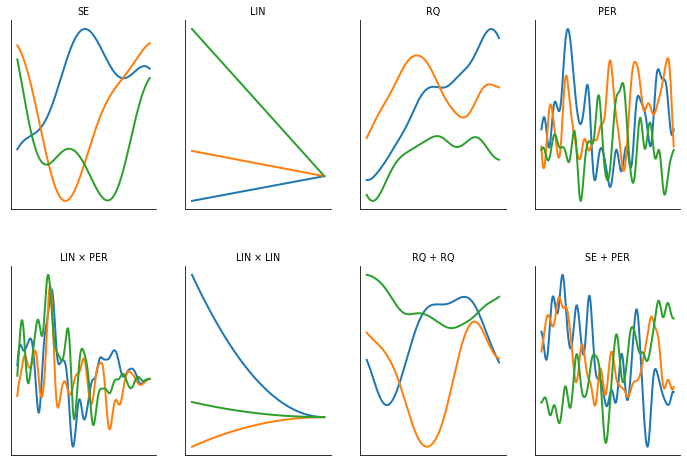

In [13]:
plt.style.use('seaborn-paper')
fig, axes =  plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
((ax00, ax01, ax02, ax03), (ax10, ax11, ax12, ax13)) = axes

plot_gp_paths(se_1_data, ax00)
ax00.set_title("SE")

plot_gp_paths(lin_1_data, ax01)
ax01.set_title("LIN")

plot_gp_paths(rq_1_data, ax02)
ax02.set_title("RQ")

plot_gp_paths(per_1_data, ax03)
ax03.set_title("PER")

plot_gp_paths(lin_times_per_data, ax10)
ax10.set_title(r"LIN $\times$ PER")

plot_gp_paths(lin_times_lin, ax11)
ax11.set_title(r"LIN $\times$ LIN")

plot_gp_paths(rq_plus_rq, ax12)
ax12.set_title("RQ + RQ")

plot_gp_paths(se_plus_per, ax13)
ax13.set_title("SE + PER")

for ax in axes.reshape(-1): 
    hide_upper_ax_lines(ax)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.subplots_adjust(hspace = 0.3)
plt.savefig("gp_paths.svg")
plt.show()